### 자연어 분류 예측.

In [1]:
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from nltk.corpus import stopwords
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')               # Turn the warnings off.
# nltk.download('stopwords')

#### 1. 데이터를 읽어온다.
영화 리뷰 데이터. <br>
- 데이터의 출처는 [여기](https://perun.pmf.uns.ac.rs/radovanovic/dmsem/cd/datasets/text/MovieReviews/Movie%20Review%20Data.htm).<br>
- "polarity dataset"을 내려 받고 압축을 푼다. <br>
- "txt_sentoken" 폴더 아래에 "pos" 폴더와 "neg" 폴더가 있다. <br>

In [3]:
# 데이터 폴더 설정.
reviews = load_files(r'data\txt_sentoken/')
my_docs, y = reviews.data, reviews.target

In [4]:
len(my_docs)

2000

In [5]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1000, 1000], dtype=int64))

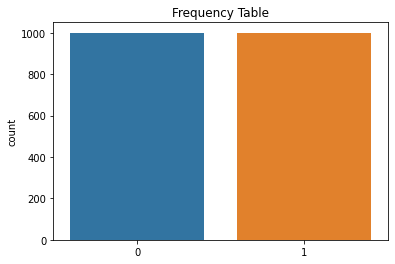

In [6]:
# 반응 변수 시각화.
sns.countplot(y).set_title("Frequency Table")
plt.show()

#### 2. 데이터 전처리.

In [7]:
corpus = []
for i in range(0, len(my_docs)):
    review = re.sub(r'\W', ' ', str(my_docs[i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+br\s+',' ',review)      
    review = re.sub(r'\s+[a-z]\s+', ' ',review)  
    review = re.sub(r'^b\s+', '', review)             
    review = re.sub(r'\s+', ' ', review)               # 잉여 space 제거.
    corpus.append(review)  

In [8]:
# 전처리 후 문서를 출력해 본다.
print(corpus[0])

arnold schwarzenegger has been an icon for action enthusiasts since the late 80 but lately his films have been very sloppy and the one liners are getting worse nit hard seeing arnold as mr freeze in batman and robin especially when he says tons of ice jokes but hey he got 15 million what it matter to him nonce again arnold has signed to do another expensive blockbuster that can compare with the likes of the terminator series true lies and even eraser nin this so called dark thriller the devil gabriel byrne has come upon earth to impregnate woman robin tunney which happens every 1000 years and basically destroy the world but apparently god has chosen one man and that one man is jericho cane arnold himself nwith the help of trusty sidekick kevin pollack they will stop at nothing to let the devil take over the world nparts of this are actually so absurd that they would fit right in with dogma nyes the film is that weak but it better than the other blockbuster right now sleepy hollow but i

#### 3. TF-IDF로 표현. 

In [9]:
TFIDF = TfidfVectorizer(max_features = 1000, min_df = 2, max_df = 0.6, stop_words = stopwords.words('english'))
TFIDF.fit(corpus)                                          # TF-IDF 모델 학습. 
X = TFIDF.transform(corpus).toarray()                      # "transform" 함으로 행렬이 생성됨.
#X = TFIDF.fit_transform(corpus).toarray()                 # 한번의 스텝으로 처리.
X.shape

(2000, 1000)

#### 4. 로지스틱 회귀 예측.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)

In [11]:
# Training.
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [12]:
# Testing.
y_pred = LR.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

In [13]:
# 혼동 행렬.
print(conf_mat)

[[238  63]
 [ 52 247]]


In [14]:
# 정확도.
print(np.round(acc,3))

0.808
